In [1]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<b>Sobre o dataset:</b>

<b>Age :</b> Age of the patient

<b>Sex :</b> Sex of the patient (0 = female, 1= male)

<b>exang:</b> exercise induced angina (1 = yes; 0 = no)

<b>ca:</b> number of major vessels (0-3)

<b>cp :</b> Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
    
<b>trtbps :</b> resting blood pressure (in mm Hg)

<b>chol :</b> cholestoral in mg/dl fetched via BMI sensor

<b>fbs :</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<b>rest_ecg : resting electrocardiographic results

Value 0:</b> normal
Value 1:</b> having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2:</b> showing probable or definite left ventricular hypertrophy by Estes' criteria

<b>thalach :</b> maximum heart rate achieved

<b>target :</b> 0= less chance of heart attack 1= more chance of heart attack

<b>Fonte de dados: </b>
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df = shuffle(df, random_state = 1)

In [8]:
df_continuos = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df_classificatorias = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
output = ['output']

[Text(0, 0, '138'), Text(0, 0, '165')]

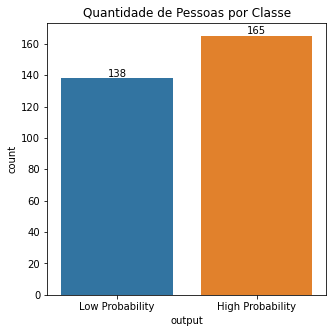

In [9]:
plt.figure(figsize=(5,5))
grafico1 = sns.countplot(x= 'output', data = df,)
plt.title("Quantidade de Pessoas por Classe")
plt.xticks([0,1],['Low Probability','High Probability'])
grafico1.bar_label(grafico1.containers[0])

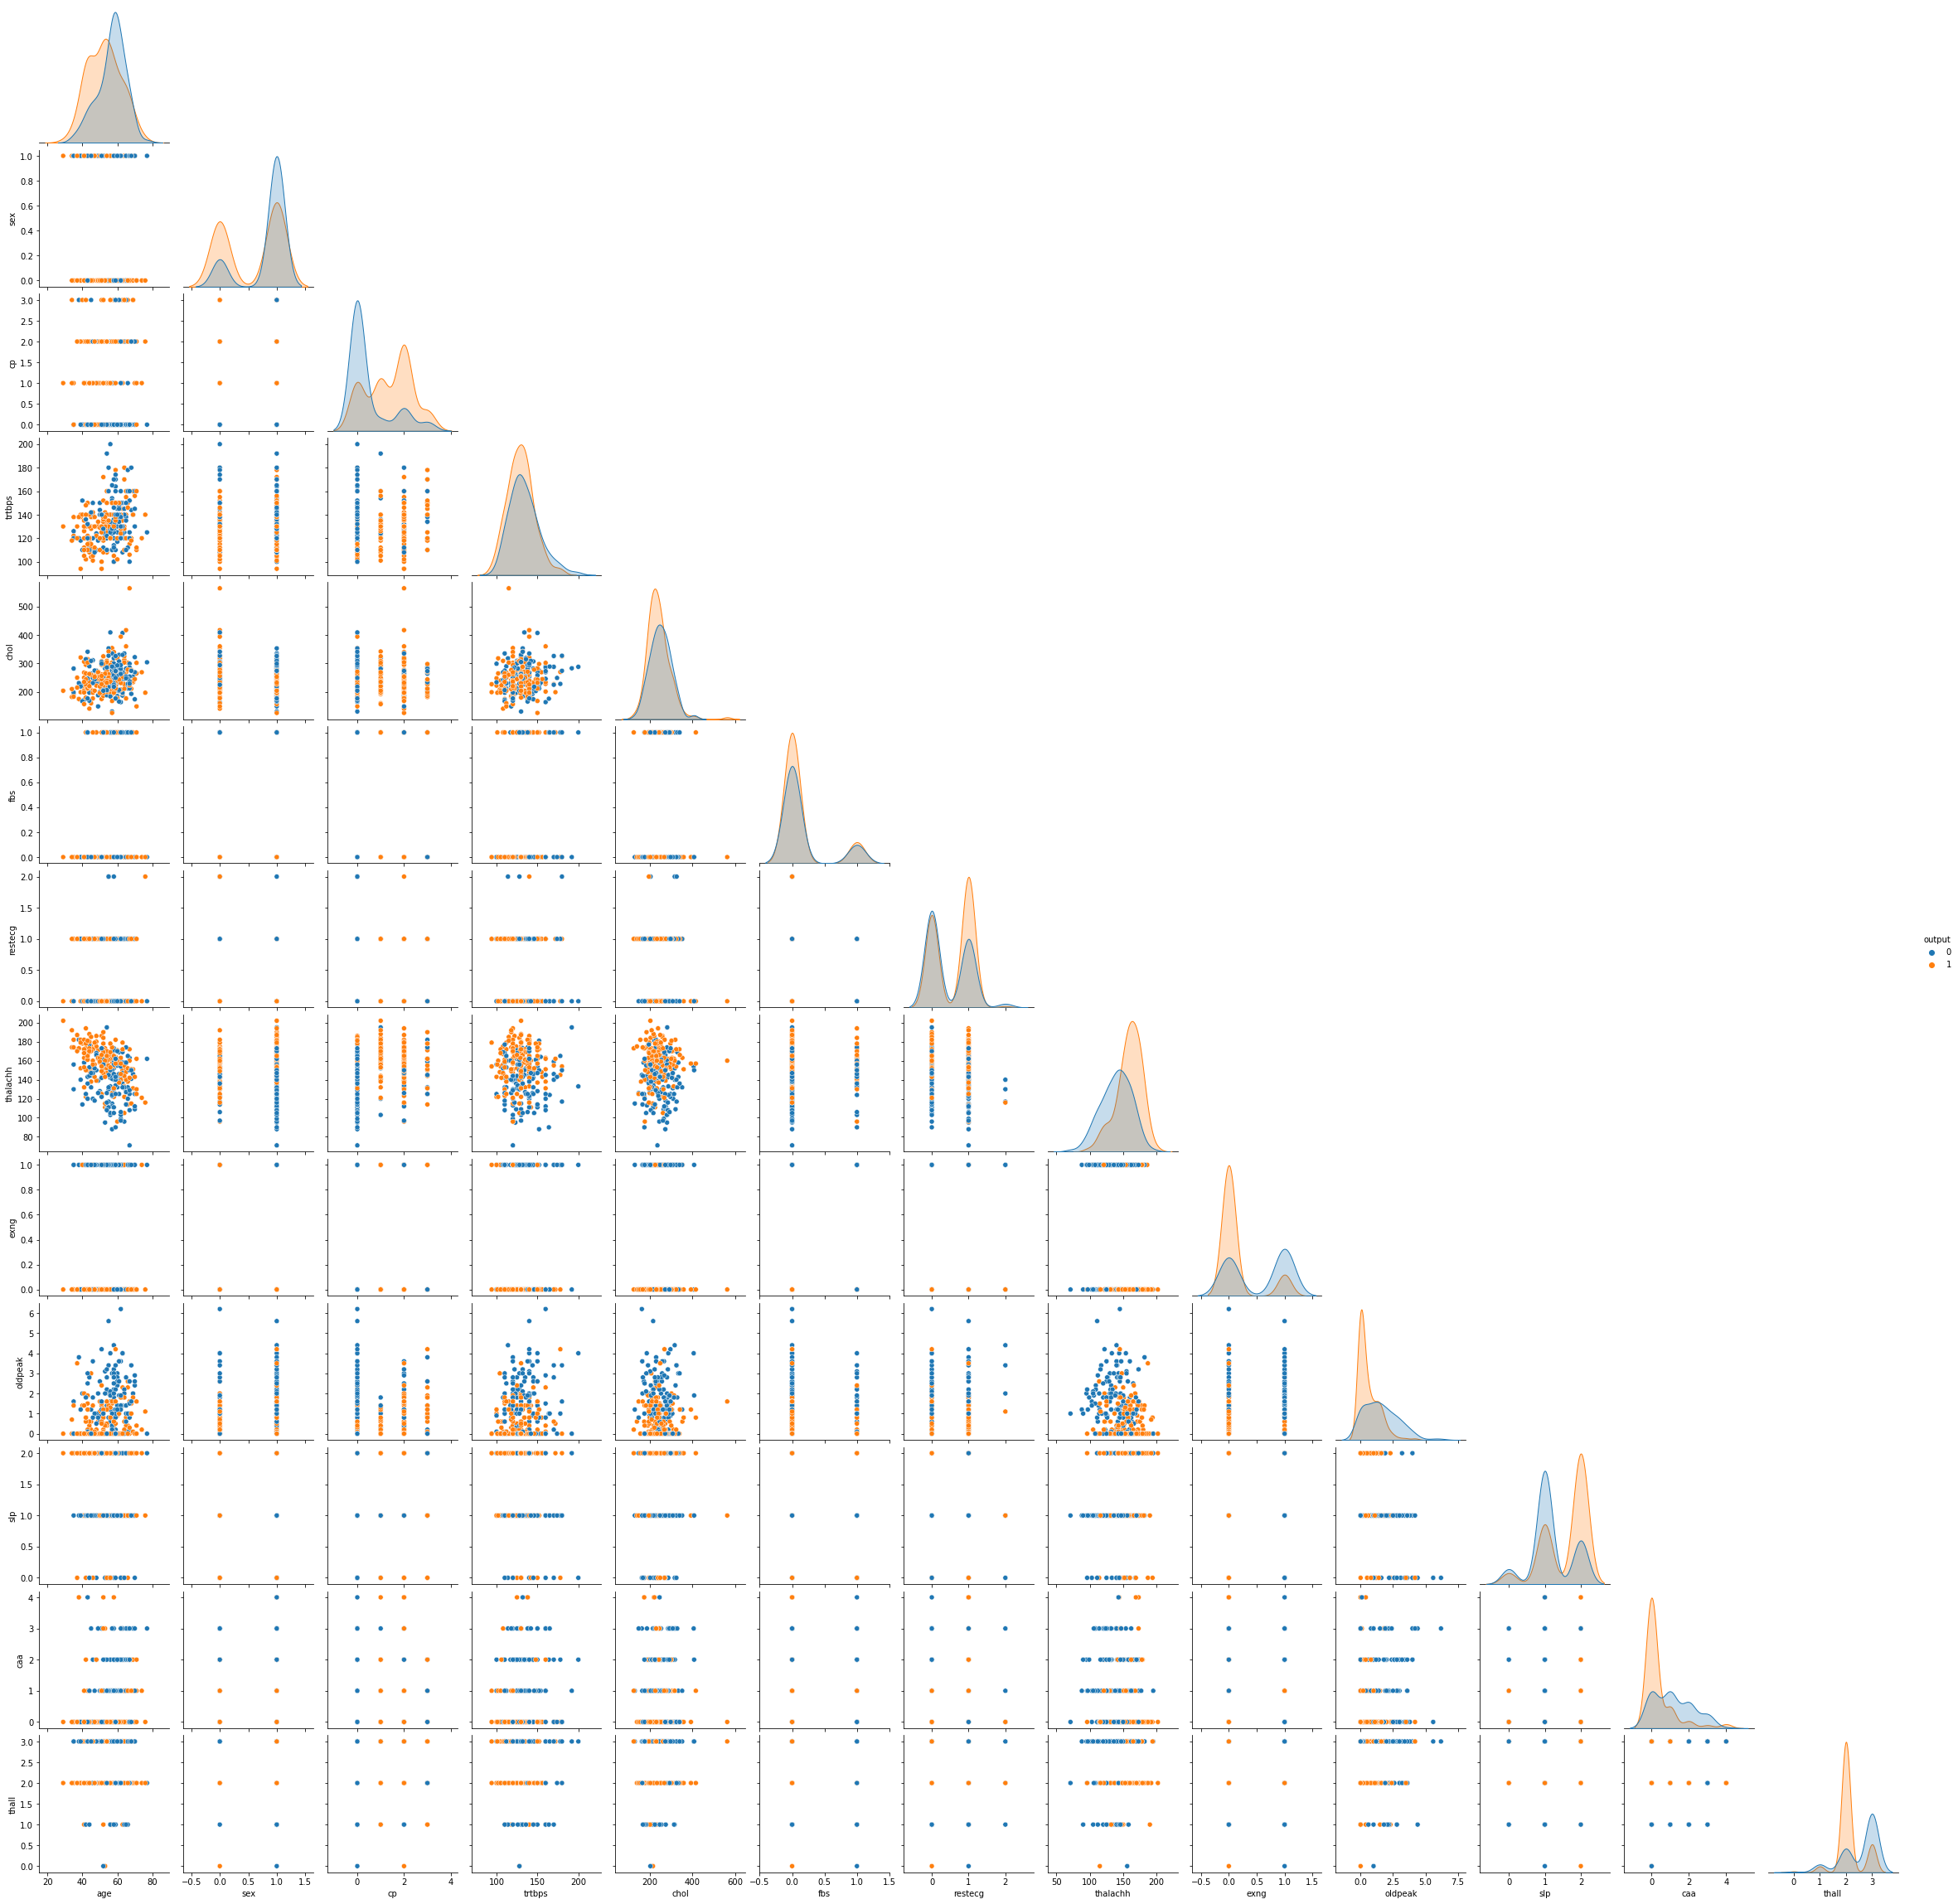

In [10]:
sns.pairplot(df, corner = True, hue = 'output' )

<AxesSubplot:>

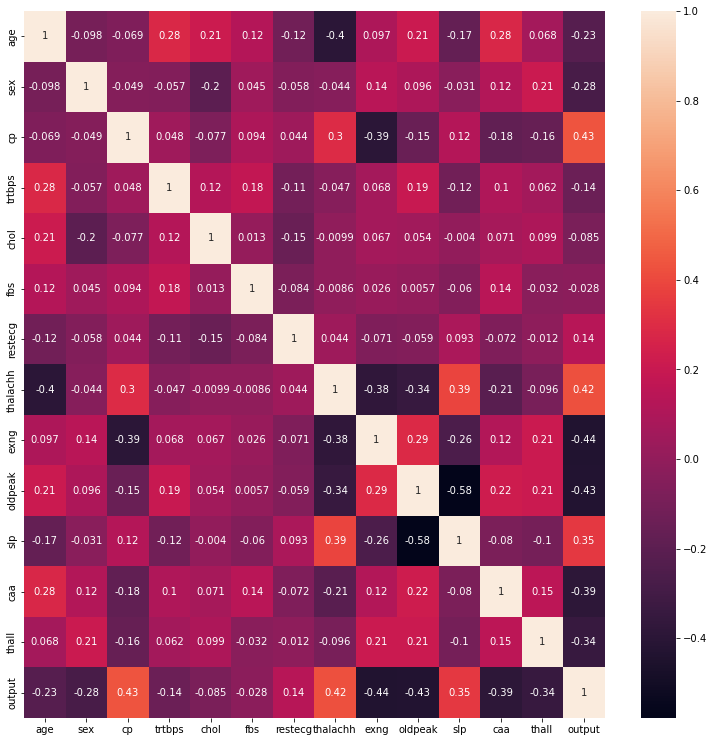

In [11]:
correlation = df.iloc[:,0:14].corr()
plt.figure(figsize=(13,13))
sns.heatmap(correlation, annot=True)

In [12]:
correlation[correlation['output']>0.3]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
slp,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
output,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,1.000000


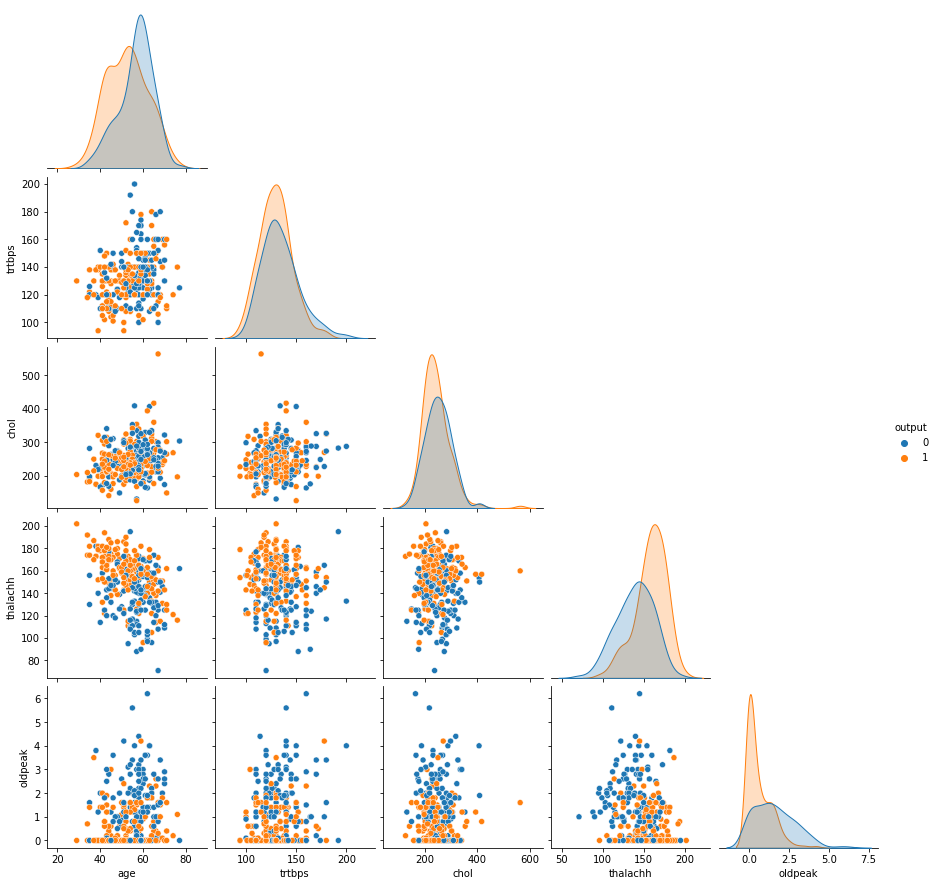

In [13]:
df_pairplot = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
sns.pairplot(df[df_pairplot], corner = True, hue = 'output' )

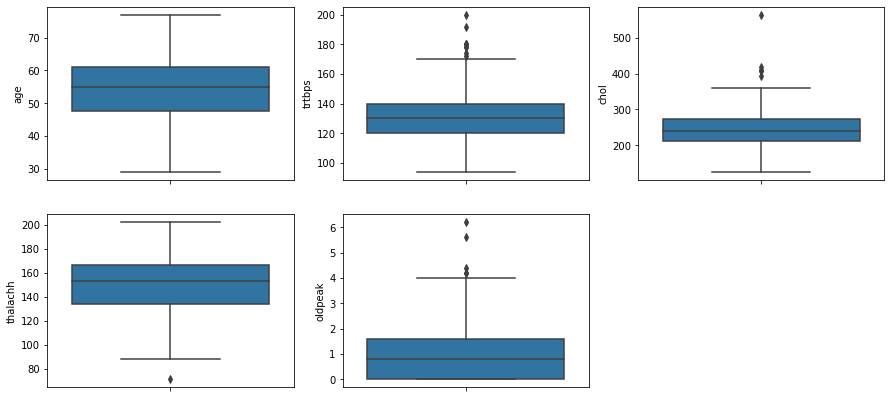

In [14]:
##df_continuos = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, ax = plt.subplots(2,3, figsize=(15,7))
ax[0,0] = sns.boxplot(y='age', data=df, ax=ax[0,0])
ax[0,1] = sns.boxplot(y='trtbps', data=df, ax=ax[0,1])
ax[0,2] = sns.boxplot(y='chol', data=df, ax=ax[0,2])
ax[1,0] = sns.boxplot(y='thalachh', data=df, ax=ax[1,0])
ax[1,1] = sns.boxplot(y='oldpeak', data=df, ax=ax[1,1])
ax[1,2].remove()

In [15]:
def get_label(grafico):
    for container in grafico.containers:
        grafico.bar_label(container)

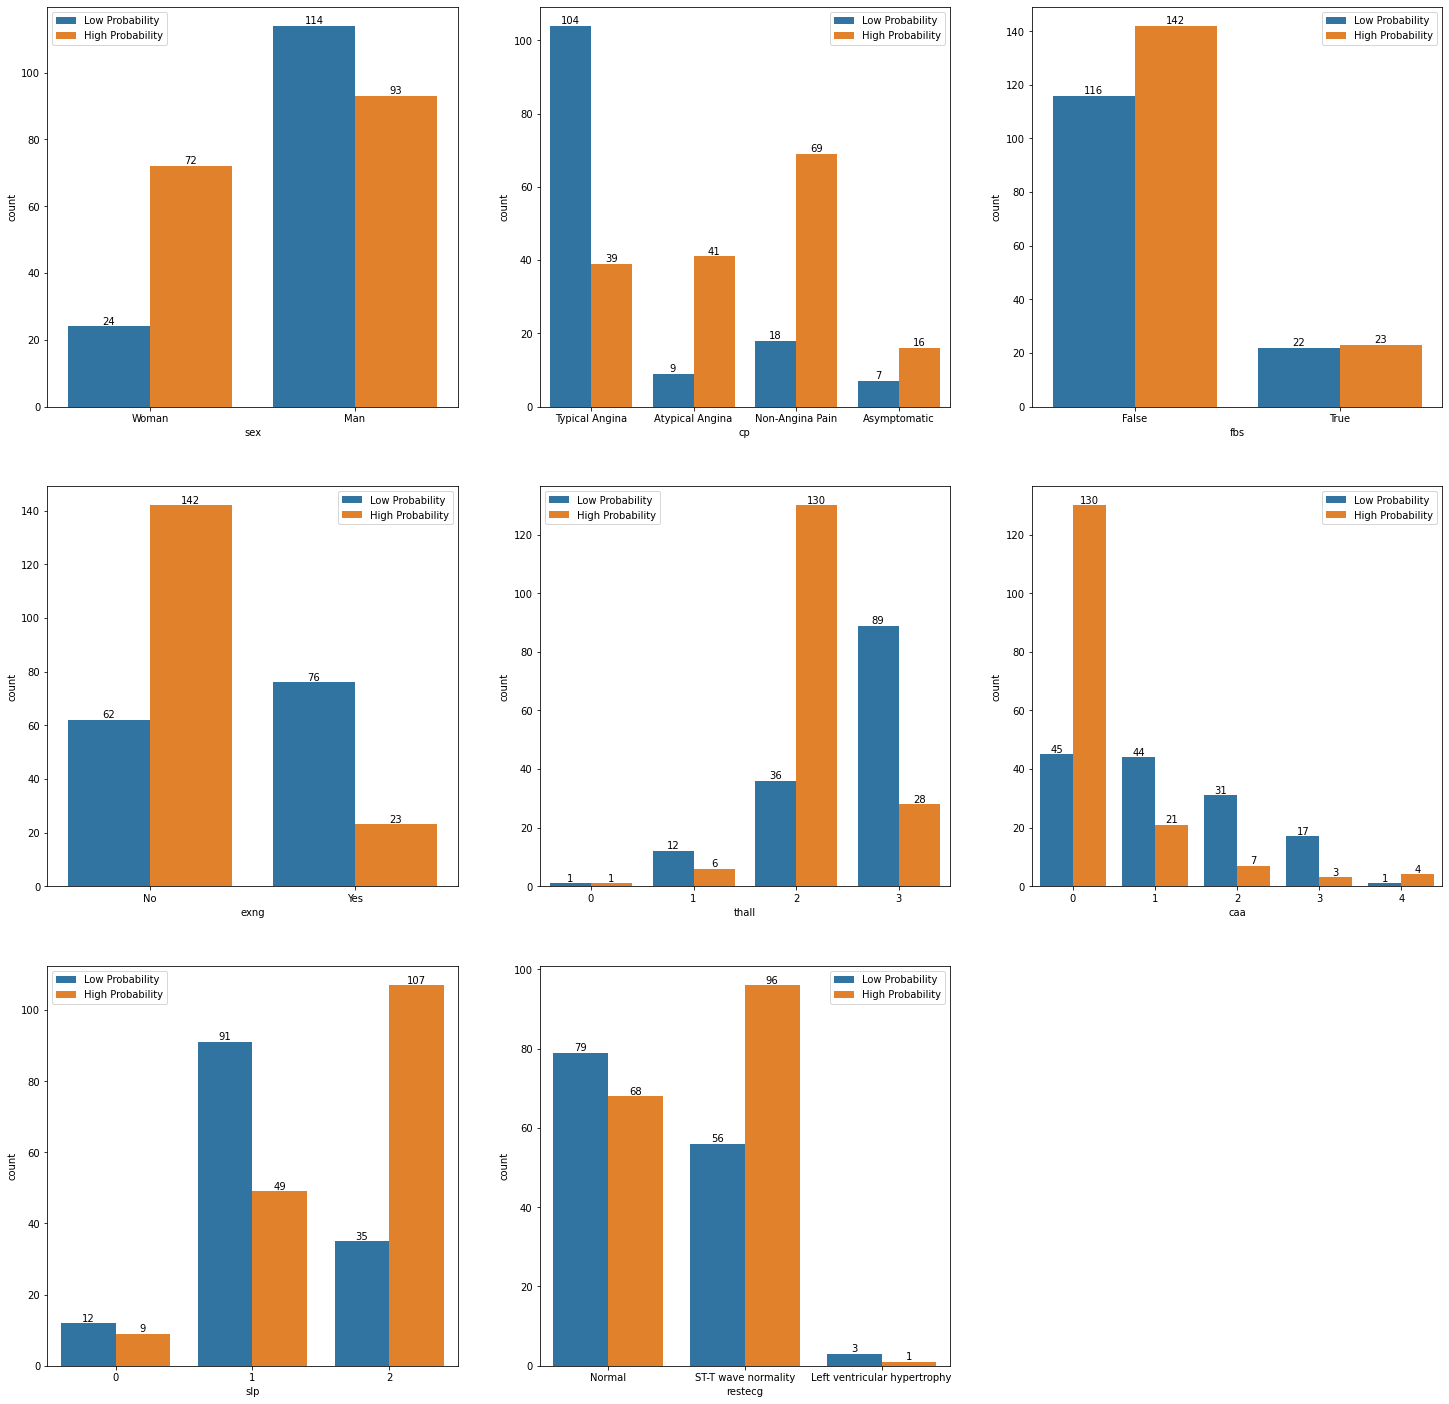

In [16]:
fig, ax = plt.subplots(3,3, figsize=(25,25))

teste = sns.countplot(x='sex' , data = df, hue='output', ax=ax[0,0])
plt.setp(ax[0,0], xticks=[0,1], xticklabels=['Woman','Man'])
ax[0,0].legend(labels = ('Low Probability','High Probability'))



ax[0,1] = sns.countplot(x= 'cp', data=df, hue='output', ax=ax[0,1])
plt.setp(ax[0,1], xticks=[0,1,2,3],xticklabels=["Typical Angina",'Atypical Angina','Non-Angina Pain','Asymptomatic'])
ax[0,1].legend(labels = ('Low Probability','High Probability'))

ax[0,2] = sns.countplot(x='fbs' , data = df, hue='output', ax=ax[0,2])
plt.setp(ax[0,2], xticks=[0,1],xticklabels=["False",'True'])
ax[0,2].legend(labels = ('Low Probability','High Probability'))



ax[1,0] = sns.countplot(x='exng' , data = df, hue='output', ax=ax[1,0])
plt.setp(ax[1,0], xticks=[0,1],xticklabels=["No",'Yes'])
ax[1,0].legend(labels = ('Low Probability','High Probability'))


ax[2,0] = sns.countplot(x='slp' , data = df, hue='output', ax=ax[2,0])
ax[2,0].legend(labels = ('Low Probability','High Probability'))


ax[1,1] = sns.countplot(x='thall' , data = df, hue='output', ax=ax[1,1])
ax[1,1].legend(labels = ('Low Probability','High Probability'))


ax[1,2] = sns.countplot(x='caa' , data = df, hue='output', ax=ax[1,2])
ax[1,2].legend(labels = ('Low Probability','High Probability'))

ax[2,1] = sns.countplot(x='restecg' , data = df, hue='output', ax=ax[2,1])
plt.setp(ax[2,1], xticks=[0,1,2],xticklabels=["Normal",'ST-T wave normality', "Left ventricular hypertrophy"])
ax[2,1].legend(labels = ('Low Probability','High Probability'))

get_label(ax[0,0])
get_label(ax[0,1])
get_label(ax[0,2])
get_label(ax[1,0])
get_label(ax[2,0])
get_label(ax[1,1])
get_label(ax[1,2])
get_label(ax[2,1])
ax[2,2].remove()



#autolabel(teste1)
# df_classificatorias = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [17]:
df_media = df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','output']]
df_media = df_media.groupby('output').mean().reset_index()

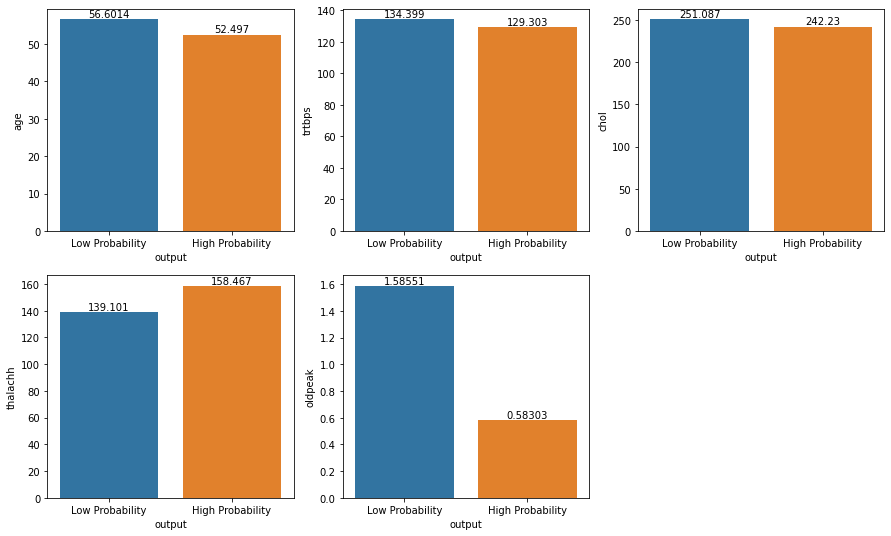

In [18]:
##df_continuos = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, ax = plt.subplots(2,3, figsize=(15,9))
ax[0,0] = sns.barplot(y='age',x=df_media['output'], data=df_media, ax=ax[0,0])
plt.setp(ax[0,0], xticks=[0,1],xticklabels=['Low Probability','High Probability'])


ax[0,1] = sns.barplot(y='trtbps',x=df_media['output'], data=df_media, ax=ax[0,1])
plt.setp(ax[0,1], xticks=[0,1],xticklabels=['Low Probability','High Probability'])

ax[0,2] = sns.barplot(y='chol',x=df_media['output'], data=df_media, ax=ax[0,2])
plt.setp(ax[0,2], xticks=[0,1],xticklabels=['Low Probability','High Probability'])


ax[1,0] = sns.barplot(y='thalachh',x=df_media['output'], data=df_media, ax=ax[1,0])
plt.setp(ax[1,0], xticks=[0,1],xticklabels=['Low Probability','High Probability'])
ax[1,1] = sns.barplot(y='oldpeak',x=df_media['output'], data=df_media, ax=ax[1,1])
plt.setp(ax[1,1], xticks=[0,1],xticklabels=['Low Probability','High Probability'])

ax[1,2].remove()
get_label(ax[0,0])
get_label(ax[0,1])
get_label(ax[0,2])
get_label(ax[1,0])
get_label(ax[1,1])


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [20]:
x = df.iloc[:,1:13]
y = df['output'].values

In [21]:
x.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
204,0,0,160,164,0,0,145,0,6.2,0,3,3
159,1,1,130,221,0,0,163,0,0.0,2,0,3
219,1,0,130,256,1,0,150,1,0.0,2,2,3
174,1,0,130,206,0,0,132,1,2.4,1,2,3
184,1,0,150,243,0,0,128,0,2.6,1,0,3


In [22]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [23]:
onehoteencoder =  ColumnTransformer(transformers=[('OneHot', 
                                                        OneHotEncoder(),
                                                        df_classificatorias)], remainder='passthrough')

In [24]:
x = onehoteencoder.fit_transform(x)

In [25]:
x

array([[  1. ,   0. ,   1. , ..., 164. , 145. ,   6.2],
       [  0. ,   1. ,   0. , ..., 221. , 163. ,   0. ],
       [  0. ,   1. ,   1. , ..., 256. , 150. ,   0. ],
       ...,
       [  0. ,   1. ,   0. , ..., 204. , 202. ,   0. ],
       [  0. ,   1. ,   1. , ..., 299. , 173. ,   1.6],
       [  0. ,   1. ,   0. , ..., 232. , 165. ,   1.6]])

In [26]:
x.shape

(303, 29)

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15, random_state =1)

In [28]:
x_train.shape

(257, 29)

In [29]:
x_test.shape

(46, 29)

In [30]:
y_train.shape

(257,)

In [31]:
y_test.shape

(46,)

In [32]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [33]:
x_train

array([[-0.69066019,  0.69066019, -0.95063332, ...,  0.50655963,
        -1.09219139, -0.88016397],
       [-0.69066019,  0.69066019,  1.05193031, ..., -0.05897393,
        -0.95756636,  1.30212014],
       [ 1.44789003, -1.44789003,  1.05193031, ...,  0.05413278,
        -0.28444121, -0.88016397],
       ...,
       [-0.69066019,  0.69066019,  1.05193031, ...,  1.43026444,
        -1.81019154,  1.13425213],
       [-0.69066019,  0.69066019,  1.05193031, ...,  0.03528167,
         0.38868394, -0.37655995],
       [-0.69066019,  0.69066019,  1.05193031, ...,  0.14838838,
         0.61305899, -0.71229597]])

In [34]:
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(x_train, y_train)
previsoesdecisiontree = model_decisiontree.predict(x_test)
previsoesdecisiontree

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1], dtype=int64)

In [35]:
model_decisiontree.feature_importances_

array([0.02222731, 0.01568987, 0.27408698, 0.        , 0.        ,
       0.00943873, 0.        , 0.00784493, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03289655, 0.0935106 , 0.00323892, 0.        , 0.00619941,
       0.        , 0.        , 0.        , 0.10009593, 0.        ,
       0.12297366, 0.12412308, 0.07955769, 0.10811636])

In [36]:
accuracy_score(y_test, previsoesdecisiontree)

0.6739130434782609

In [37]:
print(classification_report(y_test,previsoesdecisiontree))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57        21
           1       0.66      0.84      0.74        25

    accuracy                           0.67        46
   macro avg       0.69      0.66      0.65        46
weighted avg       0.68      0.67      0.66        46



0.6739130434782609

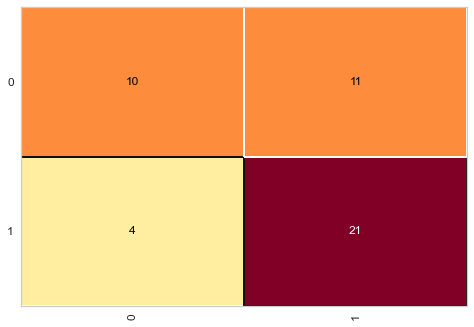

In [38]:
cm = ConfusionMatrix(model_decisiontree)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [39]:
model_random_forest = RandomForestClassifier(n_estimators = 100, random_state =1)
model_random_forest.fit(x_train, y_train)
previsoes_random_forest = model_random_forest.predict(x_test)
previsoes_random_forest

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [40]:
accuracy_score(y_test, previsoes_random_forest)

0.8695652173913043

In [41]:
print(classification_report(y_test,previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.85      0.92      0.88        25

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.87        46
weighted avg       0.87      0.87      0.87        46



0.8695652173913043

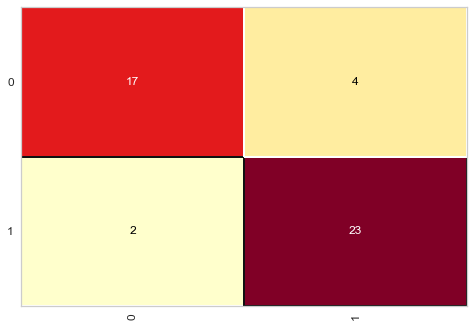

In [42]:
cm = ConfusionMatrix(model_random_forest)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [43]:
model_svm = svm.SVC()
model_svm.fit(x_train,y_train)
svm_predict = model_svm.predict(x_test)
model_svm_acc = accuracy_score(y_test,svm_predict)
print(f'Accuracy score: {model_svm_acc}')

Accuracy score: 0.8260869565217391


In [44]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.81      0.88      0.85        25

    accuracy                           0.83        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



0.8260869565217391

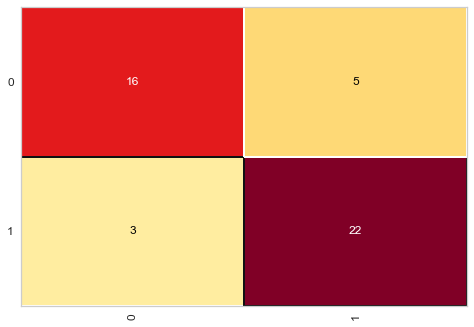

In [45]:
cm = ConfusionMatrix(model_svm)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [46]:
for i in range(1,8):
    model_KN=KNeighborsClassifier(n_neighbors=i) 
    model_KN.fit(x_train,y_train)
    KN_predict =model_KN.predict(x_test)
    KN_accuracy = accuracy_score(y_test,KN_predict)
    print(KN_accuracy, i)

0.7391304347826086 1
0.717391304347826 2
0.8043478260869565 3
0.782608695652174 4
0.8478260869565217 5
0.8695652173913043 6
0.8478260869565217 7


In [47]:
logistic_regression = LogisticRegression(max_iter = 1000)
logistic_regression.fit(x_train,y_train)
logistic_predict = logistic_regression.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_predict)
logistic_accuracy

0.9130434782608695

In [48]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.89      0.96      0.92        25

    accuracy                           0.91        46
   macro avg       0.92      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46



0.9130434782608695

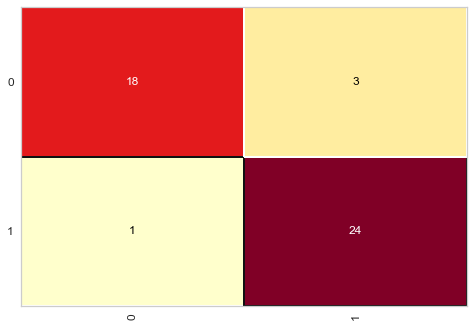

In [49]:
cm = ConfusionMatrix(logistic_regression)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [50]:
index = np.arange(1,6)
nomes = []
scores = []

In [51]:
my_pipeline = Pipeline(steps=[('model', LogisticRegression(max_iter=100))])
logistic_scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')
nomes.append("Logistic Regression")
scores.append(logistic_scores.mean())
logistic_scores.mean()


0.8516939890710382

Text(0.5, 1.0, 'Accuracy com LogisticRegression')

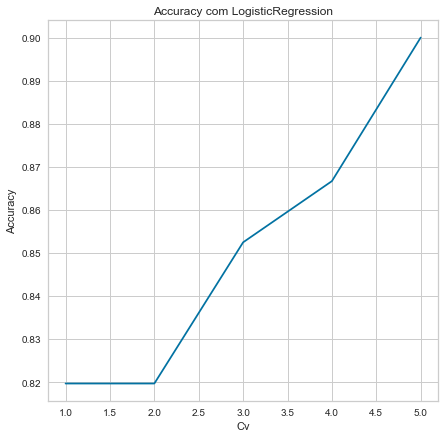

In [52]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=logistic_scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy com LogisticRegression')

In [53]:
my_pipeline = Pipeline(steps=[('model', RandomForestClassifier())])
random_forest_scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')
nomes.append("Random Forest")
scores.append(random_forest_scores.mean())
random_forest_scores.mean()

0.8254644808743169

Text(0.5, 1.0, 'Accuracy com Random Forest')

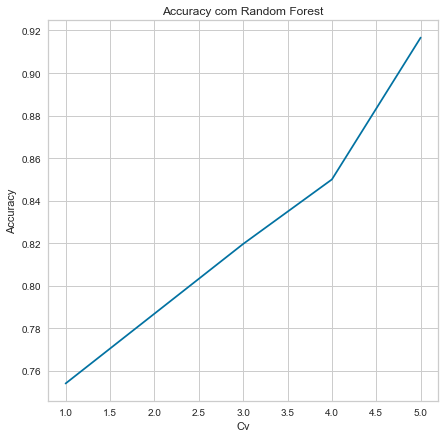

In [54]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=random_forest_scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy com Random Forest')

In [55]:
my_pipeline = Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=3))])
knc_scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')
nomes.append("K Neighbors")
scores.append(knc_scores.mean())
knc_scores.mean()

0.6341530054644808

Text(0.5, 1.0, 'Accuracy com K Neighbors')

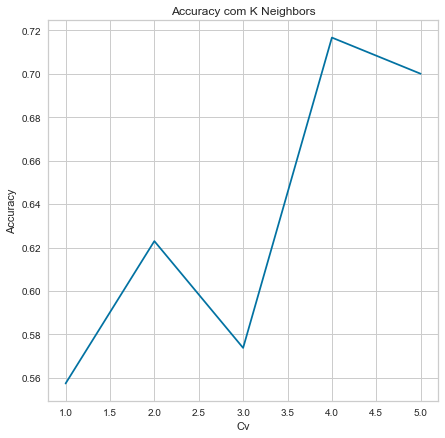

In [56]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=knc_scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy com K Neighbors')

In [57]:
my_pipeline = Pipeline(steps=[('model', DecisionTreeClassifier())])
decision_tree_scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')
nomes.append("Decision Tree")
scores.append(decision_tree_scores.mean())
decision_tree_scores.mean()

0.7260109289617487

Text(0.5, 1.0, 'Accuracy com Decision Tree')

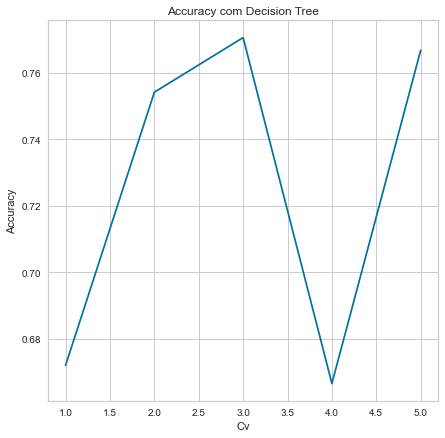

In [58]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=decision_tree_scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy com Decision Tree')

In [59]:
my_pipeline = Pipeline(steps=[('model', svm.SVC())])
svm_scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')
nomes.append("SVC")
scores.append(svm_scores.mean())
svm_scores.mean()

0.647431693989071

Text(0.5, 1.0, 'Accuracy com SVC')

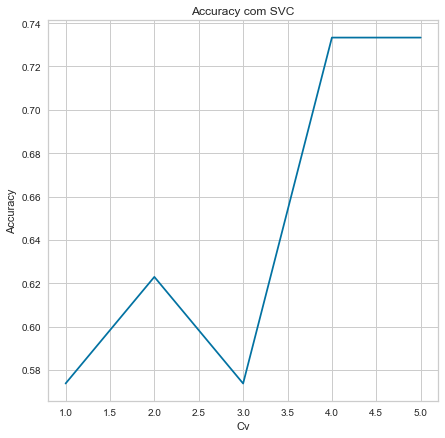

In [60]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=svm_scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy com SVC')

In [61]:
df_scores = pd.DataFrame({'modelo':nomes,'score':scores})
df_scores = df_scores.sort_values('score', ascending = False)
df_scores

,modelo,score
0,Logistic Regression,0.851694
1,Random Forest,0.825464
3,Decision Tree,0.726011
4,SVC,0.647432
2,K Neighbors,0.634153


[Text(0, 0, '0.851694'),
 Text(0, 0, '0.825464'),
 Text(0, 0, '0.726011'),
 Text(0, 0, '0.647432'),
 Text(0, 0, '0.634153')]

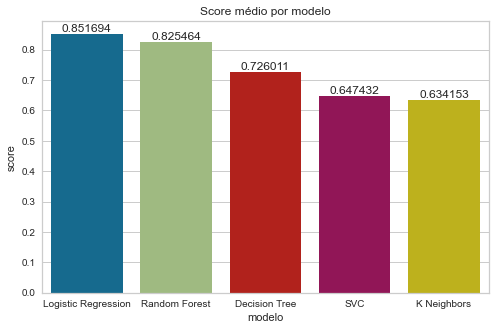

In [62]:
plt.figure(figsize=(8,5))
grafico1 = sns.barplot(x='modelo', y='score', data=df_scores)
plt.title("Score médio por modelo")
grafico1.bar_label(grafico1.containers[0])

<b>Conclusão:</b><br>
Dataset um pouco desbalanceado, onde possuem 165 pessoas com alta probabilidade de ataque do coração e 138 com pouca probabilidade.
Não conseguimos ver uma alta correlação entre idade e sexo em relação ao output<p>
    

<b>As maiores correlações que conseguimos encontrar em relação ao output são: </b><br>
<b>Cp -> 43% </b> -> pessoas com baixa probabilidade costumam ter 'Typical Angina', pessoas com alta probabilidade costumam ter Atypical Angina e Non Angina Pain

<b>thalachh -> 42%</b> sendo que a média de thalachh para baixa probabilidade é de 139 mil vs 158 mil para alta probabilidade


<b>slp -> 34% -></b> pessoas com alta probabilidade de ataque costumam ter um slp maior (nível 2) do que quem tem baixa probabilidade (nivel 0 e 1)

Outro ponto interessante é que pessoas com alta probabilidade possuem um ccaa de nivel baixo ao contrario de pessoas com alta probabilidade


<b>Em relação aos outliers:</b> <br>
Foi possível identificar tanto no pair plot quanto nos boxplots em quase todas as categorias:
thalachh, trtbps, chol e oldpeak



<b>Aos modelos de machine learning:</b><br>
Foi utilizado a normalização por meio do StandardScaler, além do onehoteencoder para divisão dos atributos classificatórios.<br>
Dos 5 modelos utilizados, o que se encaixou melhor nos dados foi a Logistic Regression, que quando aplicado a cross validation deu uma média de 85%